# Import useful packages

In [6]:
#!pip install ipympl
# importing sys
#!pip install wget
import wget
import os
os.remove("utilsLaris.py")
wget.download("https://raw.githubusercontent.com/Ah-essabar/LARIS01/master/utilsLaris.py")

'utilsLaris.py'

In [13]:
#!pip install pyjanitor

In [2]:
import janitor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
# import utilsPolytech
import utilsLaris
import os
os.environ['NUMEXPR_MAX_THREADS'] = '16'
import ipywidgets as widgets
%matplotlib widget

# Import data

In [5]:
# use dayfirst = True to have correct date
if os.path.isfile("WeatherFile_2022_02_03to28.txt")==False:
    wget.download("https://raw.githubusercontent.com/Ah-essabar/LARIS01/master/Data/WeatherFile_2022_02_03to28.txt")
raw_data = pd.read_csv("WeatherFile_2022_02_03to28.txt", sep="\t",skiprows=(1),parse_dates=[['Date','Time']],dayfirst=True )
df = raw_data.copy()
df =df.set_index("Date_Time")
# we use import janitor to clean colonne's name
df=df.clean_names()
# df_column_uniquify : allows to have unique column names
df = utilsLaris.df_column_uniquify(df)
df = df[['out','hum','bar_','rad_']]


In [6]:
raw_data.head()

,Date_Time,Out,Temp,Temp.1,Hum,Pt.,Speed,Dir,Run,Speed.1,...,Hum.1,Dew,Heat,EMC,Density,ET,Samp,Tx,Recept,Int.
0,2022-02-03 14:00:00,6.1,6.1,5.9,91,4.7,3.2,W,1.61,6.4,...,35,7.9,23.6,6.93,1.1823,0.05,149,1,21.8,30
1,2022-02-03 14:30:00,6.1,6.2,6.1,91,4.8,4.8,W,2.41,12.9,...,34,7.3,23.3,6.74,1.1833,0.00,684,1,100.0,30
2,2022-02-03 15:00:00,6.4,6.4,6.1,90,4.9,4.8,W,2.41,12.9,...,34,7.4,23.4,6.74,1.1830,0.03,685,1,100.0,30
3,2022-02-03 15:30:00,6.7,6.7,6.4,90,5.2,4.8,W,2.41,14.5,...,34,7.5,23.5,6.73,1.1828,0.00,690,1,100.0,30
4,2022-02-03 16:00:00,6.9,7.0,6.7,89,5.3,3.2,W,1.61,11.3,...,34,7.4,23.4,6.74,1.1831,0.03,700,1,100.0,30


In [7]:
df.head()

,out,hum,bar_,rad_
Date_Time,,,,
2022-02-03 14:00:00,6.1,91,1019.7,91
2022-02-03 14:30:00,6.1,91,1019.6,60
2022-02-03 15:00:00,6.4,90,1019.8,56
2022-02-03 15:30:00,6.7,90,1019.8,52
2022-02-03 16:00:00,6.9,89,1019.8,47


In [8]:
#df = df.sort_index()
df=df.resample("5T").mean()
df = df.interpolate(method='linear', limit_direction='forward', axis=0)
#df =df.fillna(method="bfill")


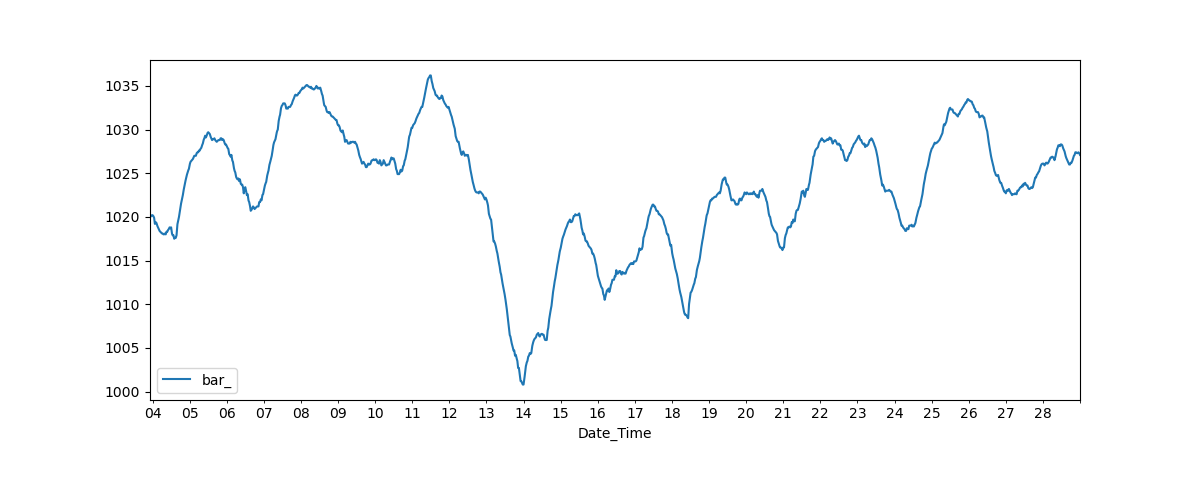

In [9]:
ax = df.iloc[100:,:].plot(figsize=(12, 5)) 
# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%d-%m'))
plt.legend(loc='lower left')
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()
plt.show()

In [10]:
df

,bar_
Date_Time,
2022-02-03 14:00:00,1019.700000
2022-02-03 14:05:00,1019.683333
2022-02-03 14:10:00,1019.666667
2022-02-03 14:15:00,1019.650000
2022-02-03 14:20:00,1019.633333
...,...
2022-02-28 23:40:00,1027.233333
2022-02-28 23:45:00,1027.200000
2022-02-28 23:50:00,1027.166667


C:\Users\ahmed\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


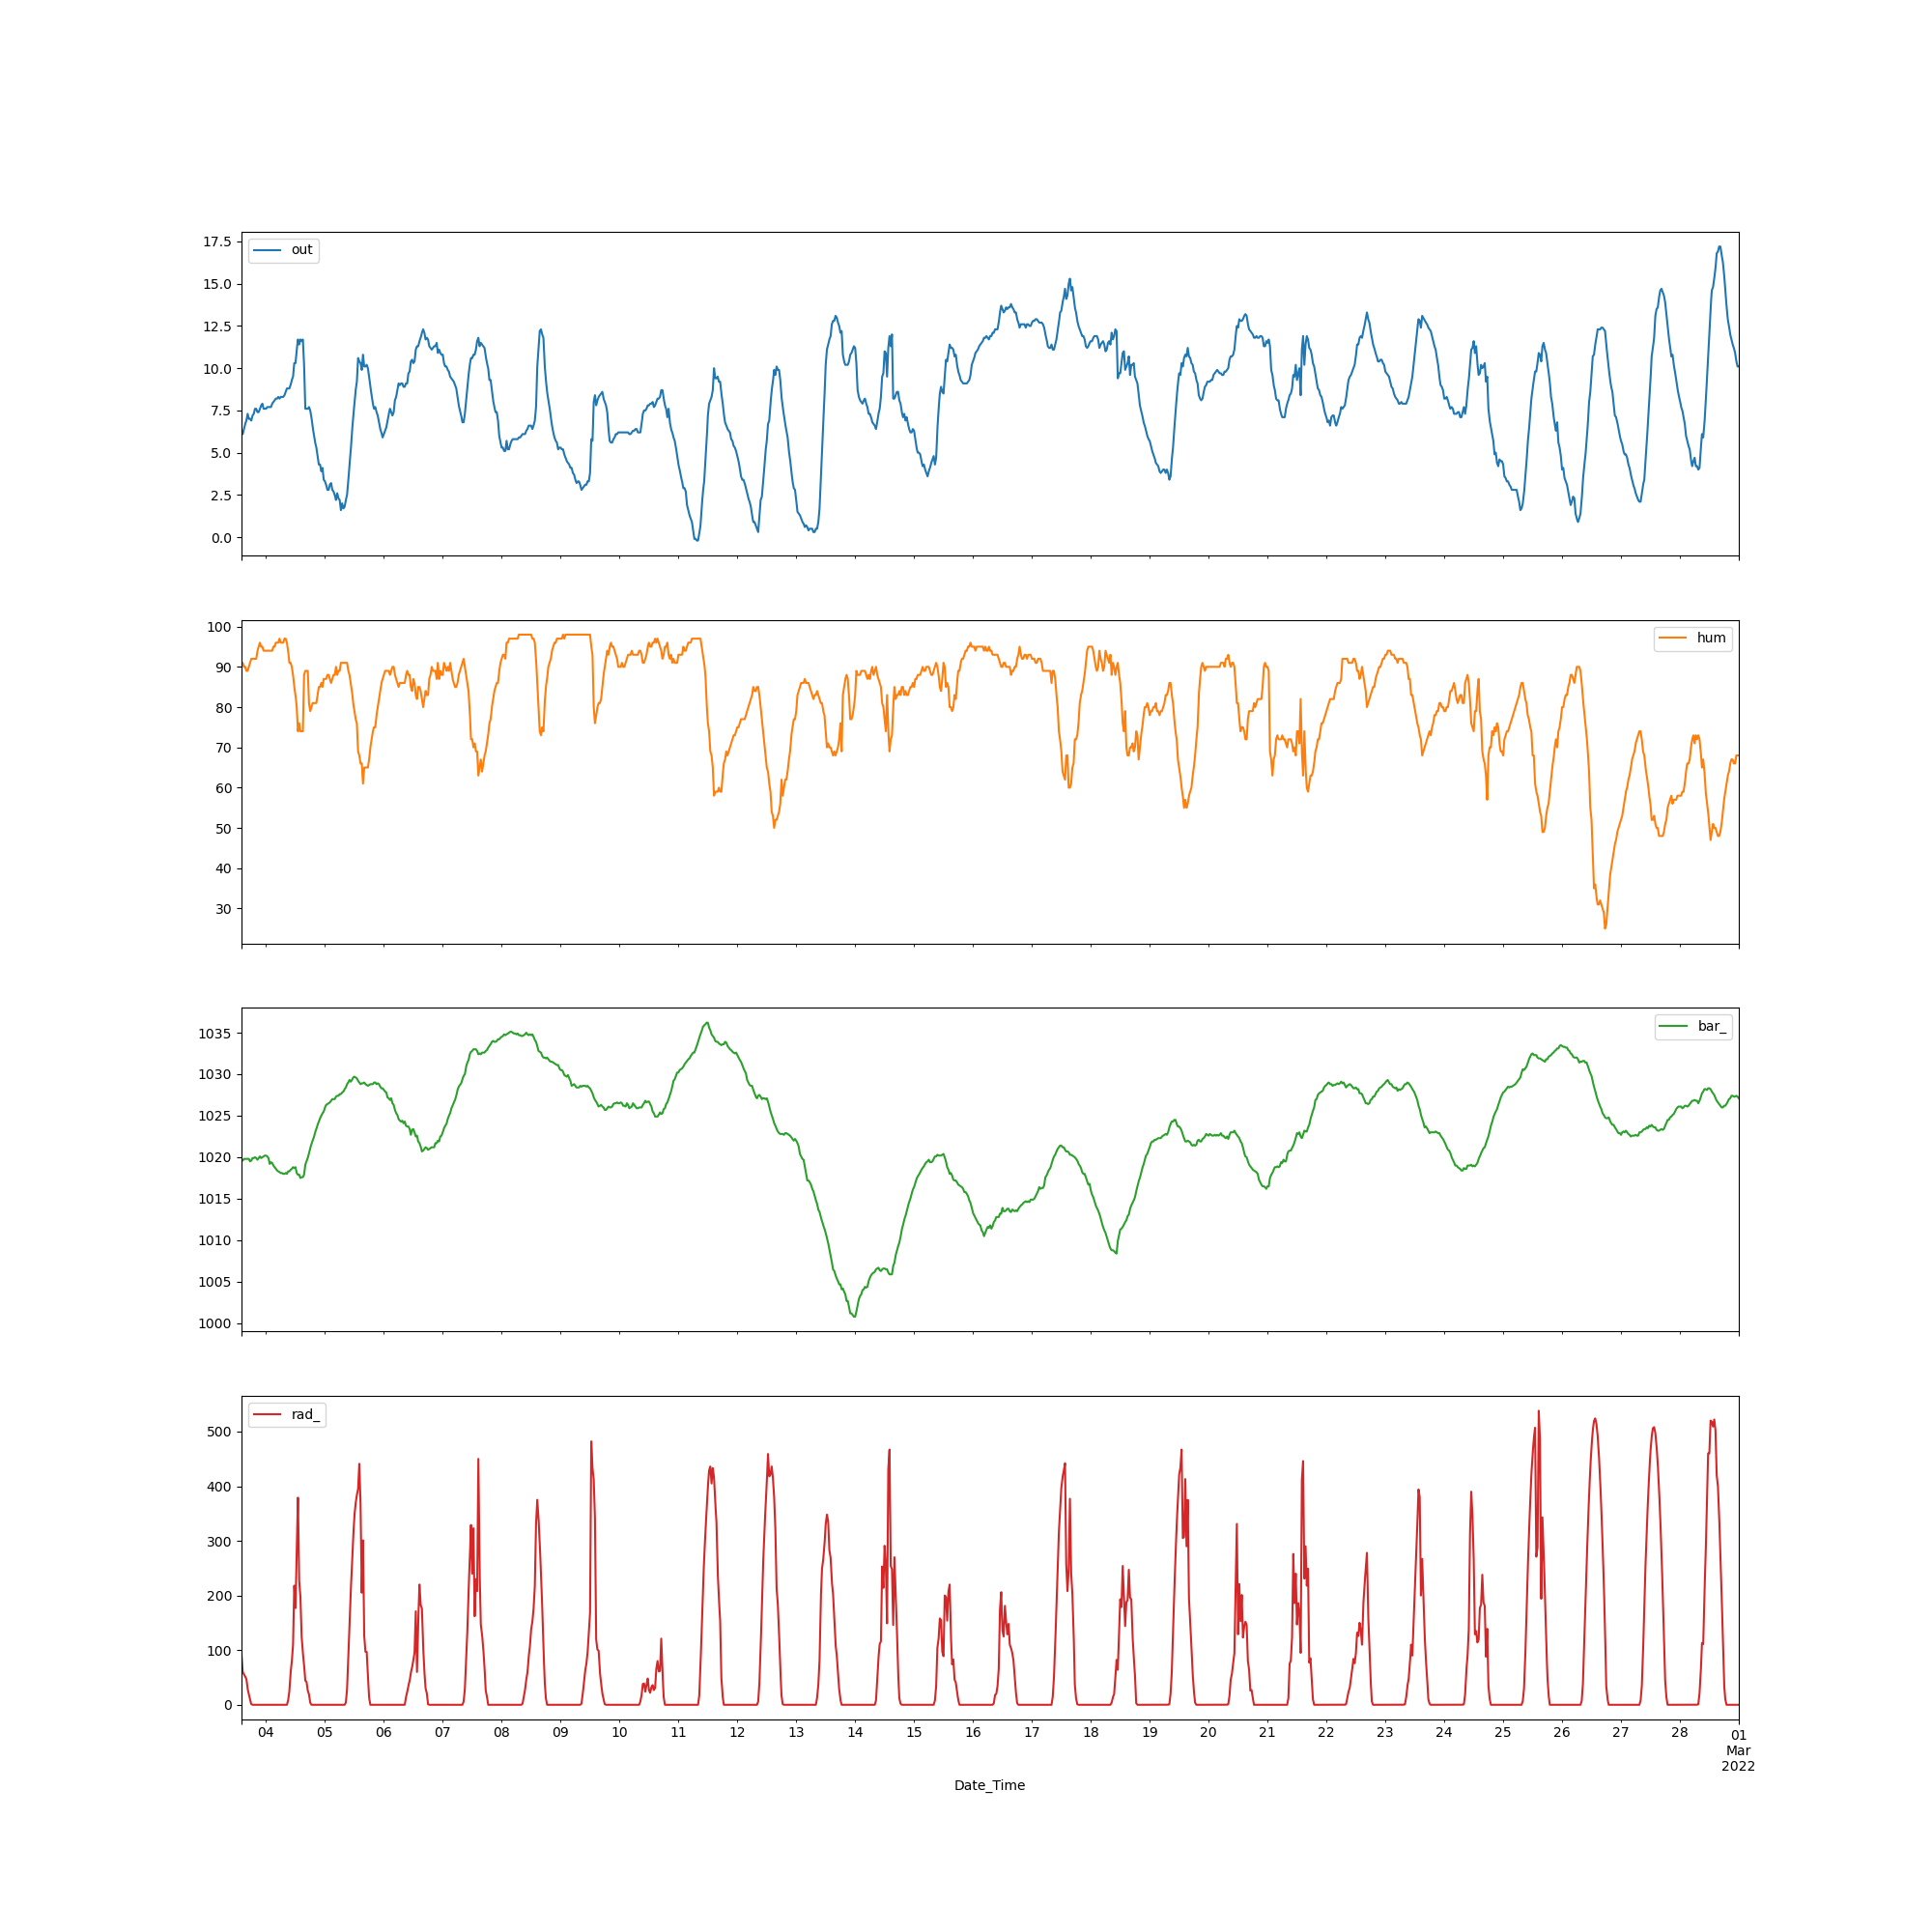

In [129]:
sn = df.plot(figsize=(20, 20), subplots=True)

<AxesSubplot:>

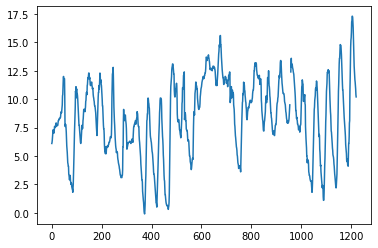

In [21]:
raw_data.Temp.plot()

## dataFusion

C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temp'>

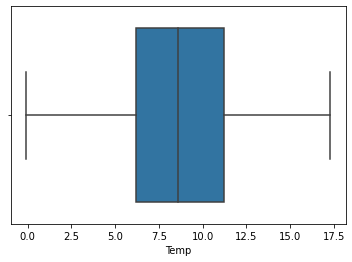

In [12]:
sns.boxplot(raw_data['Temp'])

# Analyse measured data

In [13]:
corr = raw_data.corr()
corr

,Out,Temp,Temp_1,Hum,Pt_,Speed,Run,Speed_1,Chill,Index,...,Hum_1,Dew,Heat,EMC,Density,ET,Samp,Tx,Recept,Int_
Out,1.000000,0.996190,0.995207,-0.279084,0.681505,0.534900,0.534279,0.555391,0.961663,0.996215,...,0.374903,0.318969,-0.065660,0.353166,-0.362179,0.302873,-0.149703,NaN,-0.133178,NaN
Temp,0.996190,1.000000,0.994291,-0.294393,0.667369,0.530874,0.530244,0.550688,0.957272,0.991257,...,0.366067,0.315585,-0.053249,0.343440,-0.365655,0.303436,-0.141262,NaN,-0.126047,NaN
Temp_1,0.995207,0.994291,1.000000,-0.263486,0.688224,0.528790,0.528148,0.547527,0.957630,0.992746,...,0.388327,0.328583,-0.073660,0.366608,-0.359390,0.277212,-0.147670,NaN,-0.132438,NaN
Hum,-0.279084,-0.294393,-0.263486,1.000000,0.503284,-0.114071,-0.114350,-0.101649,-0.266332,-0.200044,...,0.515851,0.481927,-0.232805,0.536061,0.012093,-0.399244,-0.040703,NaN,-0.029560,NaN
Pt_,0.681505,0.667369,0.688224,0.503284,1.000000,0.401537,0.400833,0.428858,0.651958,0.739297,...,0.743793,0.665862,-0.247987,0.739604,-0.319549,-0.036145,-0.164321,NaN,-0.141129,NaN
Speed,0.534900,0.530874,0.528790,-0.114071,0.401537,1.000000,0.999989,0.968822,0.292691,0.540615,...,0.363083,0.072095,-0.531519,0.369083,-0.236967,0.204079,0.115681,NaN,0.128180,NaN
Run,0.534279,0.530244,0.528148,-0.114350,0.400833,0.999989,1.000000,0.968726,0.291948,0.539959,...,0.362749,0.071834,-0.531421,0.368764,-0.236712,0.204063,0.115863,NaN,0.128338,NaN
Speed_1,0.555391,0.550688,0.547527,-0.101649,0.428858,0.968822,0.968726,1.000000,0.326960,0.562442,...,0.361634,0.075771,-0.526565,0.367571,-0.242270,0.198461,0.126891,NaN,0.140342,NaN
Chill,0.961663,0.957272,0.957630,-0.266332,0.651958,0.292691,0.291948,0.326960,1.000000,0.956255,...,0.315759,0.342308,0.088676,0.289426,-0.330378,0.281071,-0.188463,NaN,-0.174189,NaN
Index,0.996215,0.991257,0.992746,-0.200044,0.739297,0.540615,0.539959,0.562442,0.956255,1.000000,...,0.429345,0.366845,-0.091619,0.408984,-0.368444,0.272134,-0.156236,NaN,-0.138277,NaN


sns.pairplot(sensor_100.drop(["id","date","room","sensor"],axis=1), hue="co2")

In [14]:
sns.violinplot(x="sensor", y="temperature", data=raw_data)

ValueError: Could not interpret input 'sensor'

In [15]:
sns.violinplot(x="sensor", y="co2", data=raw_data)

ValueError: Could not interpret input 'sensor'

In [16]:
sns.violinplot(x="sensor", y="tvoc", data=raw_data)

ValueError: Could not interpret input 'sensor'

In [17]:
sns.violinplot(x="sensor", y="humidity", data=raw_data)

ValueError: Could not interpret input 'sensor'

In [18]:
sns.violinplot(x="sensor", y="light", data=raw_data)

ValueError: Could not interpret input 'sensor'

In [19]:
sns.violinplot(x="sensor", y="sound", data=raw_data)

ValueError: Could not interpret input 'sensor'

In [20]:
# for sensor 100
axs = sensor_100.plot(figsize=(20, 30), subplots=True)

NameError: name 'sensor_100' is not defined

In [21]:
# Compare data from all sensors
import ipywidgets as widgets
%matplotlib widget

excluded_sensors = [105,106,107]
sensors_list_updated = np.delete(sensors_list, [np.where(sensors_list == i) for i in excluded_sensors])
print("Sensors to display : ",sensors_list_updated)

values = ["co2","tvoc","temperature","humidity" ,"light","sound"]
units  = ["ppm","ppb","°C","%","-","-"]

hours = mdates.HourLocator(interval = 2)
h_fmt = mdates.DateFormatter('%H:%M')
days = mdates.DayLocator(interval=5)
d_fmt = mdates.DateFormatter('%Y-%m-%d')

for i,i_value in enumerate(values):
    fig, ax = plt.subplots(figsize=(20,10))
    
    for i_sensor in sensors_list_updated : 
        globals()['ax_%s' % i_sensor] = pd.Series(globals()['sensor_%s' % i_sensor][i_value+'_'+str(i_sensor)]).plot(grid=True, 
                                                                                                   label=str(i_sensor))
    
    plt.ylabel((i_value+" "+units[i]), fontsize=14)
    plt.xlabel('Time', fontsize=14)
    plt.title(i_value, fontsize=16)    
    ax.xaxis.set_minor_locator(hours)
    ax.xaxis.set_minor_formatter(h_fmt)
    ax.xaxis.set_major_locator(days)
    ax.xaxis.set_major_formatter(d_fmt)
    ax.get_xaxis().set_tick_params(which='major', pad=15) #major locator under minor
    plt.legend(loc="upper left")

    #display plot
    plt.show()

NameError: name 'sensors_list' is not defined

NameError: name 'sensor_100' is not defined

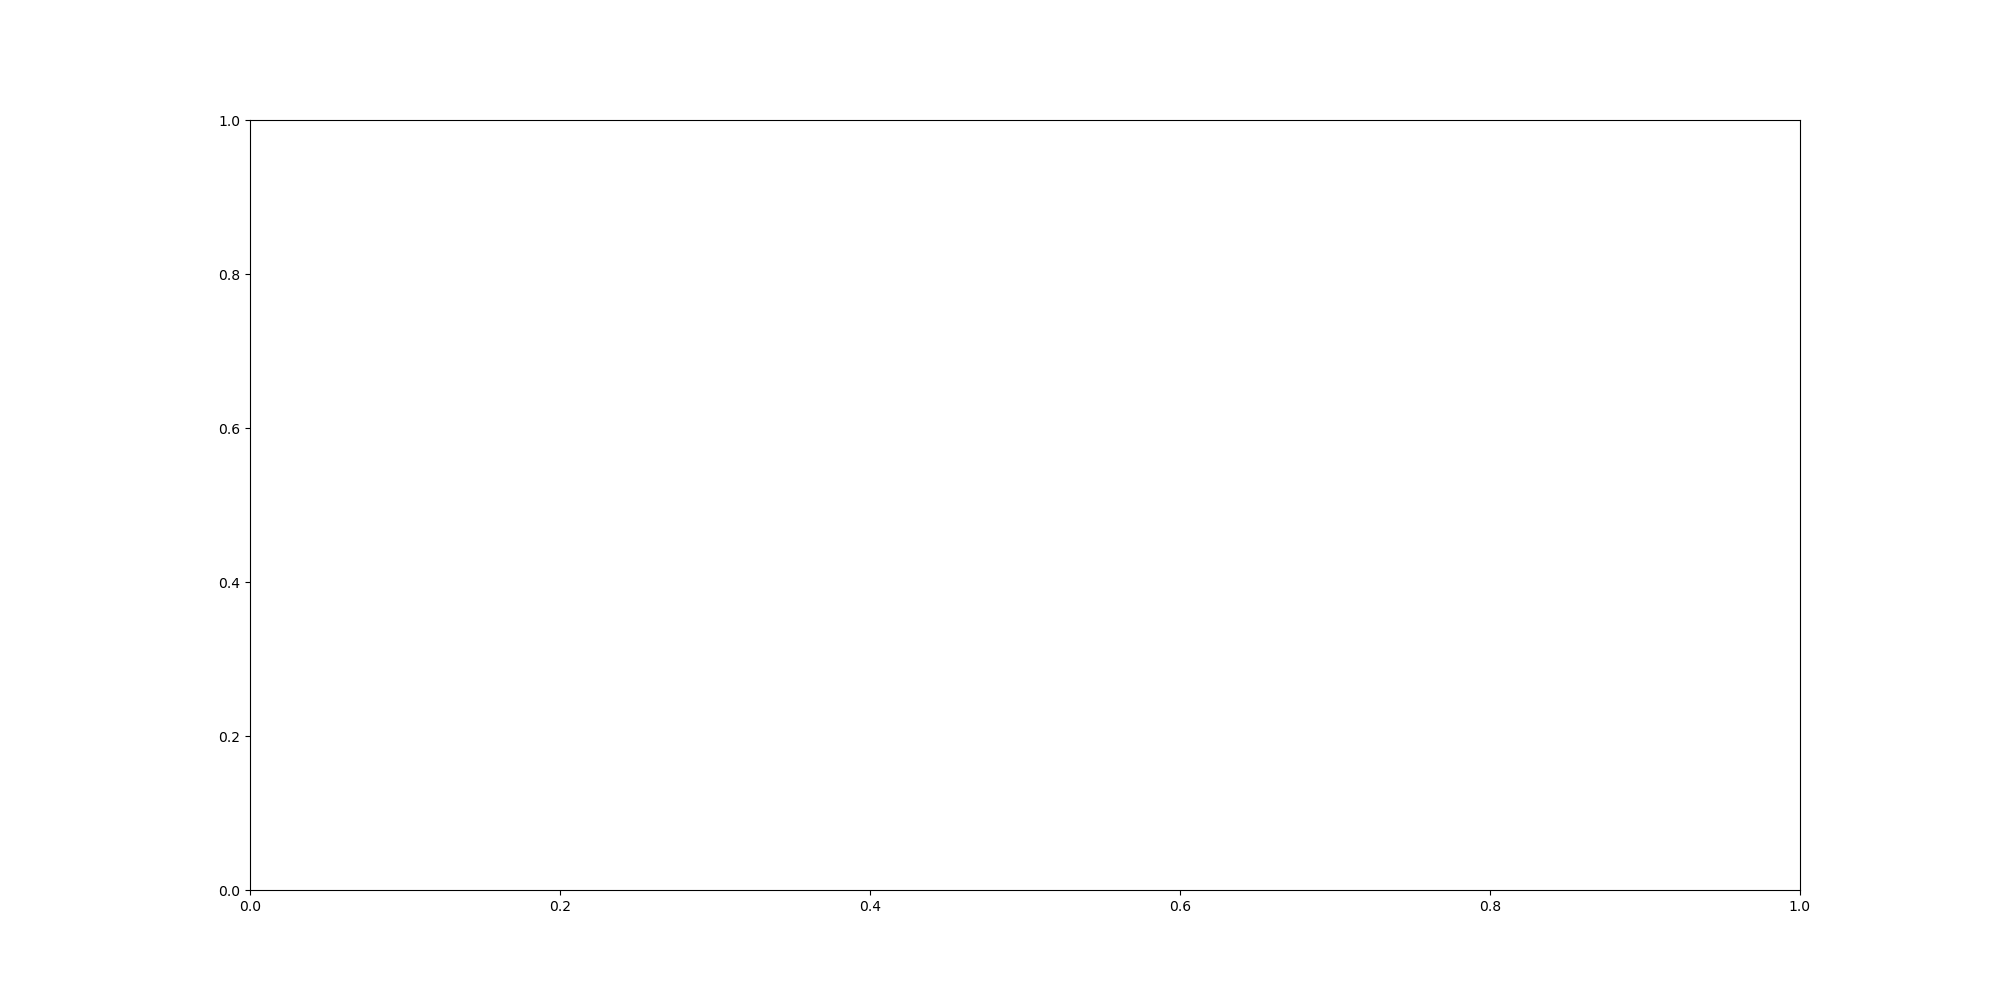

In [22]:
# Verif bonne prise en compte des dates
i_value = "temperature"
fig, ax = plt.subplots(figsize=(20,10))
df1 = pd.Series(sensor_100[i_value+'_100'])[0:5000]
df2 = pd.Series(sensor_101[i_value+'_101'])[5000:10000]

ax1 = df1.plot(grid=True, label='100')
ax2 = df2.plot(grid=True, label='101')

plt.ylabel((i_value+" "+units[i]), fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title(i_value, fontsize=16)
    
ax.xaxis.set_minor_locator(hours)
ax.xaxis.set_minor_formatter(h_fmt)
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(d_fmt)
ax.get_xaxis().set_tick_params(which='major', pad=15) #major locator under minor
plt.legend(loc="upper left")

plt.show()

In [332]:
print(sensor_100.shape, sensor_101.shape)

(32448, 9) (32399, 9)


In [333]:
sensor_103.id

date
2022-03-21 14:09:18    362801
2022-03-21 14:07:48    362797
2022-03-21 14:06:18    362793
2022-03-21 14:04:48    362789
2022-03-21 14:03:18    362785
                        ...  
2022-02-09 08:02:02        28
2022-02-09 07:56:59        22
2022-02-09 07:55:09        16
2022-02-09 07:53:19        10
2022-02-09 07:51:29         4
Name: id, Length: 32349, dtype: int64

In [51]:
# fusion de des capteurs
sensor_100.sort_index(inplace=True)
sensor_101.sort_index(inplace=True)
sensor_101_ = sensor_100.copy()
sensor_100_ = sensor_100.copy()
print("before", sensor_100_.shape,sensor_101_.shape, sensor_100_.co2_100.isnull().sum())
sensor_100_ = sensor_100_.resample('5T').mean()
sensor_101_ = sensor_101_.resample('5T').mean()
print("After", sensor_100_.shape,sensor_101.shape, sensor_100_.co2_100.isnull().sum())
df_inner = sensor_100_.merge(sensor_101_, how='left', left_index=True, right_index=True)
df_inner.shape

before (32448, 6) (32448, 6) 0
After (11596, 6) (32399, 6) 607


(11596, 12)

In [48]:
sensor_100_

<ipython-input-362-e3312272993a>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sensor_100_['2022-03-02'].co2.plot()


<AxesSubplot:xlabel='date'>

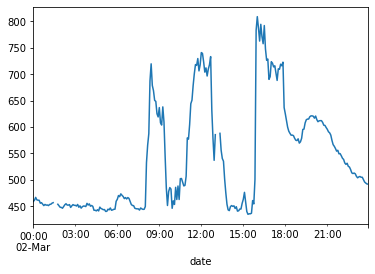

In [362]:
sensor_100_['2022-03-02'].co2.plot()

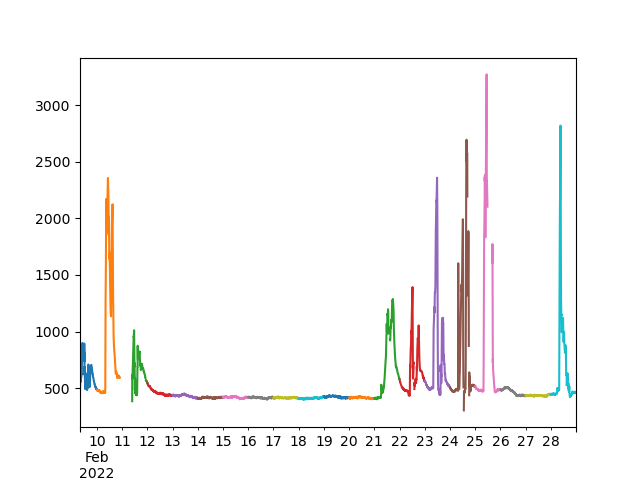

In [443]:
import ipywidgets as widgets
%matplotlib widget
sensor_100_.loc['2022-02', 'co2'].resample('D').plot()
plt.show()

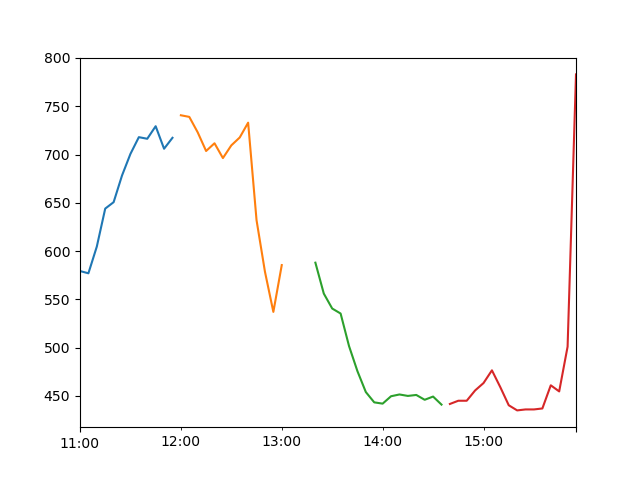

In [440]:
import matplotlib.pyplot as plt

import ipywidgets as widgets
%matplotlib widget

sensor_100_.loc['2022-03-02 11':'2022-03-02 15', 'co2'].resample('1.33H').plot()
plt.show()

In [359]:
sensor_100.sort_index(inplace=True)
y=sensor_100.index
ydif=y[1:]-y[:-1]
ydif.min()

Timedelta('0 days 00:00:27')

In [363]:
ydif.max()
hawks = sensor_100_

<Figure size 720x432 with 0 Axes>

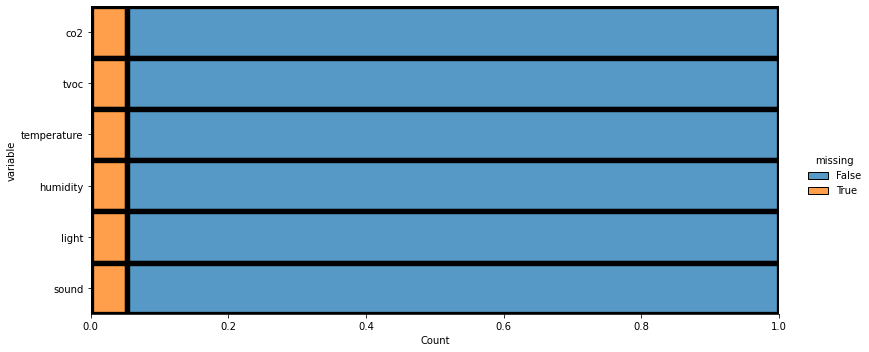

In [370]:
plt.figure(figsize=(10,6))
sns.displot(
    data=hawks.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [376]:

ydif=y[1:]-y[:-1]
ydif.min()

Timedelta('0 days 00:05:00')

In [377]:
ydif.max()

Timedelta('0 days 00:05:00')

In [ ]:
for i in range(1150):
    print(sensor_100_[['co2', 'temperature','humidity']][i*10:(i+1)*10])

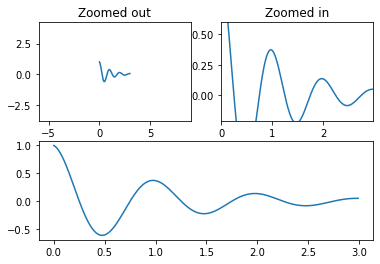

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)


t1 = np.arange(0.0, 3.0, 0.01)

ax1 = plt.subplot(212)
ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax1.plot(t1, f(t1))

ax2 = plt.subplot(221)
ax2.margins(2, 2)           # Values >0.0 zoom out
ax2.plot(t1, f(t1))
ax2.set_title('Zoomed out')

ax3 = plt.subplot(222)
ax3.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
ax3.plot(t1, f(t1))
ax3.set_title('Zoomed in')

plt.show()

In [44]:
# fusion de des capteurs
sensor_100.sort_index(inplace=True)
sensor_101.sort_index(inplace=True)
sensor_101_ = sensor_101.drop(['id','room','sensor'],axis=1)
sensor_100_ = sensor_100.drop(['id','room','sensor'],axis=1)
print("before", sensor_100_.shape,sensor_101_.shape, sensor_100_.co2.isnull().sum())
sensor_100_ = sensor_100_.resample('5T').mean()
sensor_101_ = sensor_101_.resample('5T').mean()
print("After", sensor_100_.shape,sensor_101.shape, sensor_100_.co2.isnull().sum())
df_inner = sensor_100_.merge(sensor_101_, how='left', left_index=True, right_index=True)
df_inner.shape

NameError: name 'sensor_100_' is not defined

In [101]:
# Importing
import sklearn

import pandas as pd
 
# Load the dataset

bos_hou = raw_data.copy()

 
# Create the dataframe
column_name = bos_hou.columns
df_boston = bos_hou
df_boston.columns = column_name
print(df_boston.head())
 
''' Detection '''
# IQR
Q1 = np.percentile(df_boston['co2'], 5,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_boston['co2'], 95,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df_boston.shape)
 
# Upper bound
upper = np.where(df_boston['co2'] >= (Q3+5*IQR))
# Lower bound
lower = np.where(df_boston['co2'] <= (Q1-2*IQR))
 
''' Removing the Outliers '''
df_boston.drop(upper[0], inplace = True)
df_boston.drop(lower[0], inplace = True)
 
print("New Shape: ", df_boston.shape)

       id                 date  room  sensor   co2  tvoc  temperature  \
0  362981  21/03/2022 14:25:13  S219     107   507    67        24.57   
1  362980  21/03/2022 14:25:03  S219     106   443    68        24.57   
2  362979  21/03/2022 14:24:53  S219     105  1087   167        24.78   
3  362978  21/03/2022 14:24:43  S219     104   620    51        24.87   
4  362977  21/03/2022 14:23:43  S219     107   506    52        24.55   

   humidity  light  sound  
0     31.46    548    511  
1     31.57    427    507  
2     31.34    494    511  
3     31.33    623    512  
4     31.50    552    510  
Old Shape:  (313809, 10)
New Shape:  (313728, 10)


In [102]:
df_boston.max()

id                          362981
date           28/02/2022 23:59:55
room                          S219
sensor                         113
co2                           4834
tvoc                         65535
temperature                 655.35
humidity                    655.35
light                        65535
sound                        65535
dtype: object

In [85]:
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10
